In [18]:

%matplotlib inline


%config InlineBackend.figure_formats = ['svg']

%config InlineBackend.rc = {'figure.figsize': (5.0, 3.0)}

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

def convert_to_float(s):
    try:
        return np.float(s)
    except ValueError:
        return np.nan

df = pd.read_csv("../data/SF-Salaries/Salaries.csv.bz2", 
                 converters = {'BasePay': convert_to_float,
                              'OvertimePay': convert_to_float,
                              'OtherPay': convert_to_float,
                              'Benefits': convert_to_float},
                 dtype = {'Status': str})

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Aufgabe 1:

Visualisiere die Einkommensverteilung (BasePay oder TotalPayBenefits) für das Jahr 2014!

In [20]:
base_pay_2014_max = df.loc[df["Year"] == 2014, "BasePay"].max()

<AxesSubplot:xlabel='BasePay', ylabel='Count'>

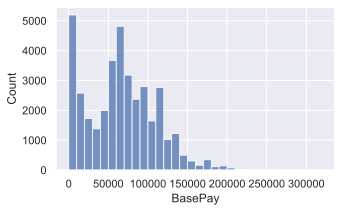

In [21]:
sns.histplot(data = df[df["Year"] == 2014], x = "BasePay", binwidth = 10000, binrange = (0, base_pay_2014_max))

## Aufgabe 2

Wir möchten nach San Francisco ziehen. Welchen öffentlichen Job sollten wir annehmen, um möglichst viel zu verdienen?

Der Job muss aber auch "erreichbar" sein für uns, "CAPTAIN III (POLICE DEPARTMENT)" wäre für uns so ohne weiteres vermutlich nicht erreichbar. 

Ermittle also die häufigsten 10 Jobs (gruppiert nach der Spalte `JobTitle`) und plotte zu jedem JobTitle das durchschnittliche Gesamteinkommen (TotalPayBenefits) für das Jahr 2014 in einem Balkendiagramm. Für welchen Job sollten wir uns bewerben?

In [22]:
df_2014 = df[df["Year"] == 2014]
df_jobs = df_2014\
    .groupby("JobTitle")\
    .agg(count = ("Id", len), avgPay = ("TotalPayBenefits", np.mean))\
    .sort_values("count", ascending = False)\
    .iloc[:10]
df_jobs.head()

,count,avgPay
JobTitle,,
Transit Operator,2479,86718.995478
Special Nurse,1478,36159.035528
Registered Nurse,1234,151715.116759
Public Svc Aide-Public Works,916,10705.586725
Firefighter,815,177701.855018


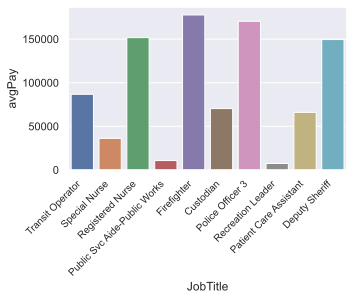

In [23]:
sns.set()

ax = sns.barplot(x = df_jobs.index, y = df_jobs["avgPay"])
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
);

Google: "rotate label seaborn"

=> https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

=> https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

## Aufgabe 3

a) Erstelle ein Balkendiagram mit verschiedenen Balken:

- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2011
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2012
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2013
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2014

b) Plotte zusätlich zum durchschnittlichen Gesamteinkommen (TotalPayBenefits) das durchschnittliche Grundgehalt "BasePay" pro Jahr. 

**Die Grafik soll dann wie folgt aussehen:** [Hier klicken (Spoiler)](Aufgabe/Einkommen-Grafik.svg)

<AxesSubplot:xlabel='Year', ylabel='avgP'>

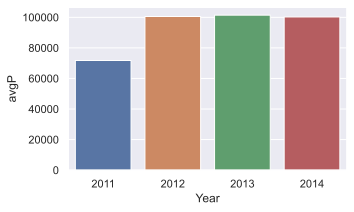

In [30]:
df_grouped = df.groupby("Year").agg(avgP = ("TotalPayBenefits", np.mean))

sns.barplot(x = df_grouped.index, y = df_grouped["avgP"])

<AxesSubplot:xlabel='Year', ylabel='value'>

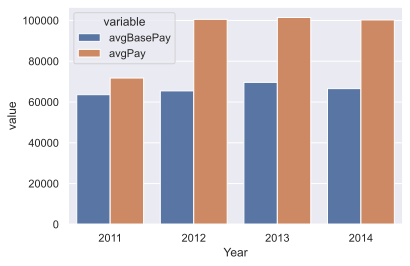

In [8]:
df_grouped = df\
    .groupby("Year")\
    .agg(avgPay = ("TotalPayBenefits", np.mean), avgBasePay = ("BasePay", np.mean))\
    .reset_index()\
    .melt(id_vars = ["Year"])

sns.barplot(x = df_grouped["Year"], 
            y = df_grouped["value"], 
            hue = df_grouped["variable"], 
            hue_order = ["avgBasePay", "avgPay"])

In [9]:
df_grouped["variable"]

0        avgPay
1        avgPay
2        avgPay
3        avgPay
4    avgBasePay
5    avgBasePay
6    avgBasePay
7    avgBasePay
Name: variable, dtype: object